# Sarah Bowman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from scipy import optimize

In [2]:
def deriv1(vec):
    t = vec[0]
    x = vec[1]
    
    dtdt = 1.0
    dxdt = np.e**x - np.cos(x) + 1
    
    return np.array([dtdt,dxdt])

In [3]:
def deriv2(vec):
    t = vec[0]
    x = vec[1]
    
    dtdt = 1.0
    dxdt = 2*x + x**3 - x**5
    
    return np.array([dtdt,dxdt])

In [4]:
def RK4(t_array,var_array,derivative):
    """
    Numerically integrates using Runge Kutta method
    
    Receives:
    t_array -> array with times to integrate
    pos_vel_array -> array containing the variables to be integrated
    derivative -> derivative function computing all derivatives
    
    Returns:
    results -> 2D array with all the data
    
    """

    dt = t_array[1] - t_array[0]

    results= np.zeros((len(t_array), len(var_array)) )

    for i, t in enumerate(t_array):
        results[i] = var_array

        k1 = dt*derivative(var_array)
        k2 = dt*derivative(var_array + k1/2.)
        k3 = dt*derivative(var_array + k2/2.)
        k4 = dt*derivative(var_array + k3)
        
        var_array = var_array + k1/6. + k2/3. + k3/3. + k4/6.
    
        column_names =['t','x']
        data= Table(results,names=column_names)

    return data

In [5]:
times = np.linspace(0,5,100)
t0 = 0
x0 = 1.5
initcond = np.array([t0,x0])
var_array = initcond

In [6]:
sol2 = RK4(times,var_array,deriv2)

In [7]:
def deriv3(vec):
    t = vec[0]
    x = vec[1]
    
    dtdt = 1.0
    dxdt = np.log(x)*(x**2 - 5*x +6)
    
    return np.array([dtdt,dxdt])

In [8]:
sol3 = RK4(times,var_array,deriv3)

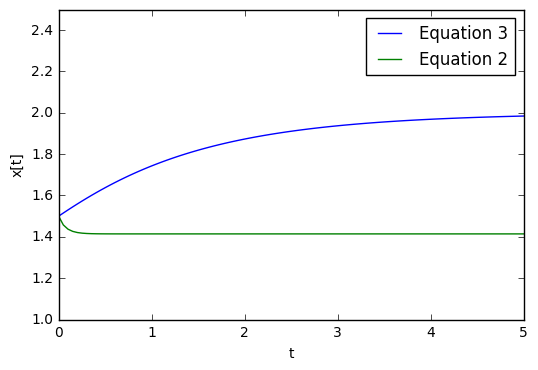

In [9]:
plt.plot(sol3['t'],sol3['x'], label = 'Equation 3')
plt.plot(sol2['t'],sol2['x'], label = 'Equation 2')
plt.xlim(0,5)
plt.ylim(1,2.5)
plt.xlabel('t')
plt.ylabel('x[t]')
plt.legend(loc ='best')

In [10]:
def flowmap1D(integrator,t_array,deriv,a,b,Nsteps=100):
    times = np.linspace(0,10,100000)
    t0 = 0
    x0arr = np.linspace(a,b,Nsteps)
    for x in x0arr: 
        x0 = x
        initcond = np.array([t0,x0])
        var_array = initcond
        sol = integrator(t_array, var_array, deriv)
        plt.plot(sol['t'],sol['x'])
    plt.xlim(0,5)
    plt.ylim(a,b)
    plt.xlabel('t')
    plt.ylabel('x[t]')
    plt.savefig("hw1fig16.pdf")
    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos


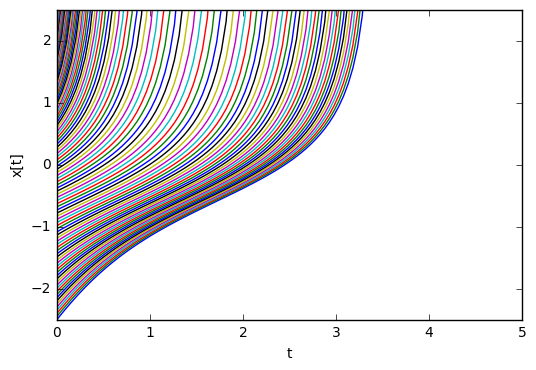

In [11]:
flowmap1D(RK4,times,deriv1,-2.5,2.5)

(-5, 5)

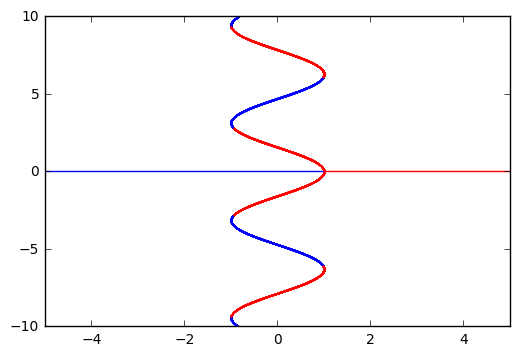

In [39]:
#def func(x, mu):
    #return np.e**(-x**2./mu)- 1./(x**2.+1.)
#def funcD(x, mu):
    #return (-2.*x/mu)*np.e**(-x**2./mu)- 2.*x/(x**2.+1.)**2
#def func(mu,x):
    #return np.sin(x) + mu*x*(x-4*np.pi)
#def funcD(x, mu):
    #return np.cos(x) + mu*(x-4*np.pi) + mu*x
def func(mu,x):
    return -x*np.cos(x) + mu*x
def funcD(x, mu):
    return x*np.sin(x) + mu
mu = np.linspace(-5,5, 10000)
x = np.linspace(-10.,10.,10000)
stable = []
unstable = []
for i in x:
    res = optimize.fsolve(func,[-5,5], args = (i))
    for j in res:
        deriv = funcD(i,j)
        if deriv < 0 :
            stable.append([j,i])
        if deriv > 0: 
            unstable.append([j,i])
    
st = np.array(stable)
unst = np.array(unstable)
plt.plot(st[:,0], st[:,1],".", ms = 1)
plt.plot(unst[:,0], unst[:,1],".", ms = 1, color = 'red')
plt.plot(np.linspace(-5,1,100),np.zeros(100), color = "blue")
plt.plot(np.linspace(1,5,100),np.zeros(100), color = "red")
#plt.axis("equal")
plt.xlim(-5,5)
#plt.ylim(10,10)

In [23]:
optimize.fsolve?